# Jupyter Coding Challenge - Aspaara

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_json("https://raw.githubusercontent.com/aspaara/jupyter-coding-challenge/main/planning.json")

# Overview of the data

In the following part, we can see an overview of the dataset. We will visualize the data contained in it, get details about the number of rows in it, column names and data types, and based on that decide which columns we will use for the insights provided below.

In [3]:
data.head()

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officeCity,officePostalCode,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,industry,isUnassigned,requiredSkills,optionalSkills
0,1,62d396e7,tln_3084,Frau Hermine Caspar MBA.,Intern,,Operating Unit 3,Hamburg,97311,Marjan Hande,tln_3019,33,11/01/2022 04:42 PM,11/05/2022 07:42 PM,Döhn,cl_1,Low technology,False,[],[]
1,2,3d857160,,,,Lead Associate,Operating Unit 10,Forst,50777,Herr Remo Radisch MBA.,tln_4722,33,03/08/2022 02:24 PM,03/12/2022 05:24 PM,Döhn,cl_1,Low technology,True,"[{'name': 'German', 'category': 'Language'}, {...","[{'name': 'TypeScript', 'category': 'Coding La..."
2,3,fd630e1f,tln_9166,Annegrete Eberhardt,Senior Manager,,Operating Unit 5,Jessen,23887,Hans-Eberhard Hövel,tln_8405,33,06/14/2022 03:00 AM,06/18/2022 06:00 AM,Döhn,cl_1,Low technology,False,"[{'name': 'Python', 'category': 'Coding Langua...","[{'name': 'French', 'category': 'Language'}]"
3,4,63349369,tln_3790,Francesca Mülichen-Jungfer,Lead Associate,,Operating Unit 4,Wolfach,62545,Theobald Krebs,tln_3592,23,02/25/2022 07:25 PM,02/28/2022 04:25 PM,Döhn,cl_1,Low technology,False,"[{'name': 'French', 'category': 'Language'}, {...","[{'name': 'React', 'category': 'Coding Languag..."
4,5,25fded26,tln_3790,Francesca Mülichen-Jungfer,Lead Associate,,Operating Unit 7,Iserlohn,1215,Kazim Becker B.Eng.,tln_7074,23,01/26/2022 10:06 AM,01/29/2022 07:06 AM,Döhn,cl_1,Low technology,False,"[{'name': 'Javascript', 'category': 'Coding La...","[{'name': 'R', 'category': 'Coding Language'}]"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  int64 
 1   originalId        10000 non-null  object
 2   talentId          10000 non-null  object
 3   talentName        10000 non-null  object
 4   talentGrade       10000 non-null  object
 5   bookingGrade      10000 non-null  object
 6   operatingUnit     10000 non-null  object
 7   officeCity        10000 non-null  object
 8   officePostalCode  10000 non-null  int64 
 9   jobManagerName    10000 non-null  object
 10  jobManagerId      10000 non-null  object
 11  totalHours        10000 non-null  int64 
 12  startDate         10000 non-null  object
 13  endDate           10000 non-null  object
 14  clientName        10000 non-null  object
 15  clientId          10000 non-null  object
 16  industry          10000 non-null  object
 17  isUnassigned 

After carefully analyzing the type of data the records contain, I decided it would be more efficient if I drop the columns that won't be used for the in-depth statistics. Therefore the following part is dropping them, and after it I am showing the data in the columns which are left for further statistic's details, and number of unique records for some of them.

In [5]:
data = data.drop(['id','originalId','talentId','talentName','operatingUnit','officePostalCode','jobManagerName','jobManagerId','totalHours','startDate','endDate','clientId'], axis=1)

In [6]:
data.head()

,talentGrade,bookingGrade,officeCity,clientName,industry,isUnassigned,requiredSkills,optionalSkills
0,Intern,,Hamburg,Döhn,Low technology,False,[],[]
1,,Lead Associate,Forst,Döhn,Low technology,True,"[{'name': 'German', 'category': 'Language'}, {...","[{'name': 'TypeScript', 'category': 'Coding La..."
2,Senior Manager,,Jessen,Döhn,Low technology,False,"[{'name': 'Python', 'category': 'Coding Langua...","[{'name': 'French', 'category': 'Language'}]"
3,Lead Associate,,Wolfach,Döhn,Low technology,False,"[{'name': 'French', 'category': 'Language'}, {...","[{'name': 'React', 'category': 'Coding Languag..."
4,Lead Associate,,Iserlohn,Döhn,Low technology,False,"[{'name': 'Javascript', 'category': 'Coding La...","[{'name': 'R', 'category': 'Coding Language'}]"


In [7]:
#Count unique records for booking grades, talent grades, clients, city offices, industries
cols = data.columns[:5]
for column in cols:
    print("There are " + str(data[column].nunique()) + " unique records in " + str(column))

There are 7 unique records in talentGrade
There are 7 unique records in bookingGrade
There are 363 unique records in officeCity
There are 100 unique records in clientName
There are 47 unique records in industry


# In-depth statistics

For the in-depth statistics, first there are analyses that show the grade distribution. With that, we can clearly observe which talent grades and booking grades are present in the dataset, and gain deeper understanding of their distribution.

                    2030
Intern              1500
Manager             1416
Senior Associate    1385
Associate           1322
Lead Associate      1242
Senior Manager      1105
Name: talentGrade, dtype: int64


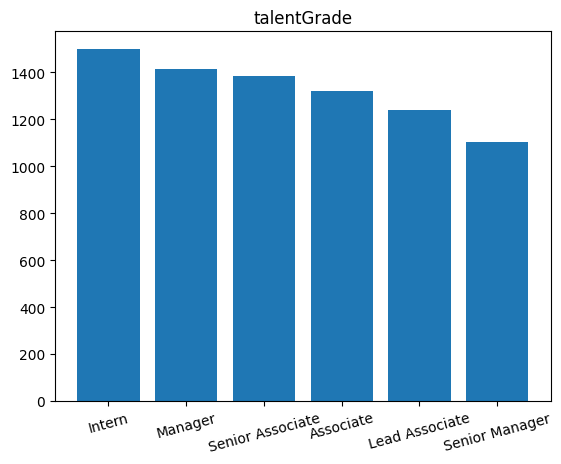

                    7970
Manager              361
Senior Manager       359
Lead Associate       345
Intern               327
Associate            325
Senior Associate     313
Name: bookingGrade, dtype: int64


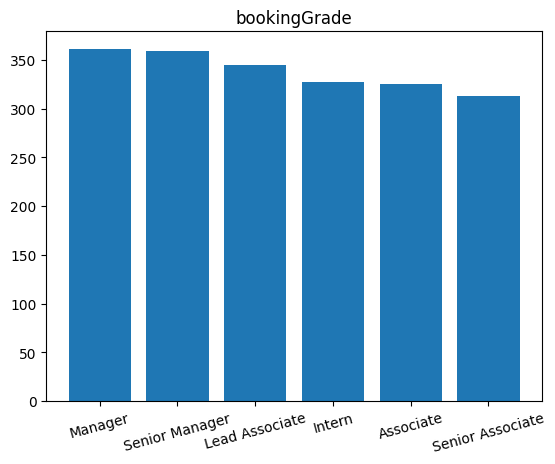

In [8]:
#talentGrade & bookingGrade
def show_grade_distribution(labels):
    for label in labels:
        grade = data[label].value_counts()
        print(grade)

        index = grade.index[1:]
        grade = grade[1:]

        plt.bar(index, grade)
        plt.xticks(rotation=15)
        plt.title(label)
        plt.show()
    
show_grade_distribution(['talentGrade', 'bookingGrade'])

Form the plotted talentGrade and bookingGrade, we can clearly see that the same roles are present in both of them. The most occurring talentGrade is Intern, and the most occurring bookingGrade is Manager. More observations are available from these plots as well.

Next, there is a statistic of unassigned booking grades per label, which can be passed as a function argument. In the displayed case, the histogram visualizes the distribution of the booking grades per client (clientName), industry and city (officeCity). By doing this I am exploring and covering in-depth statistics for booking grade, office city and industry too.

C:\Users\stefa\AppData\Local\Temp\ipykernel_14976\2459275896.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df, x=df[label], hue=df[data["isUnassigned"]]["bookingGrade"], multiple="stack")


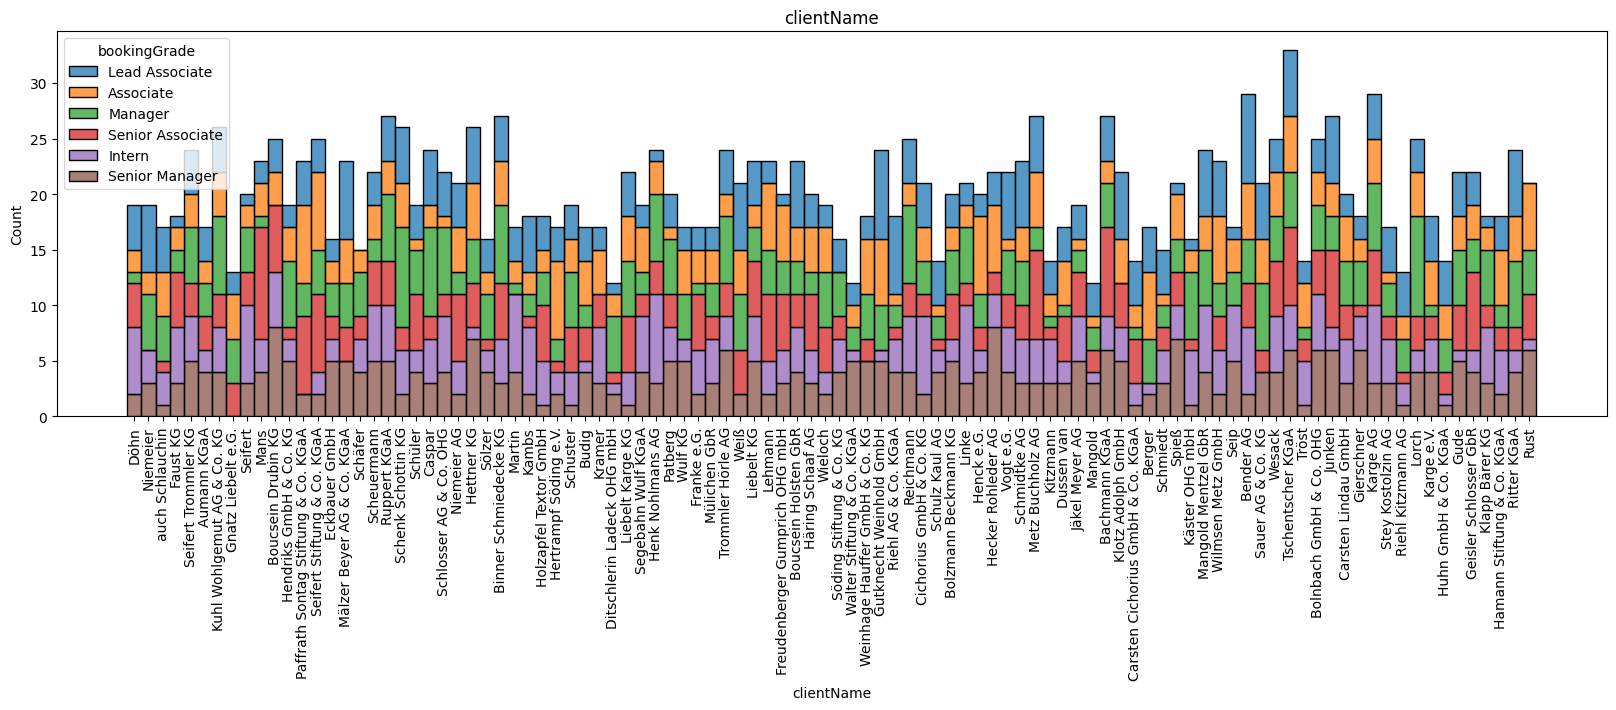

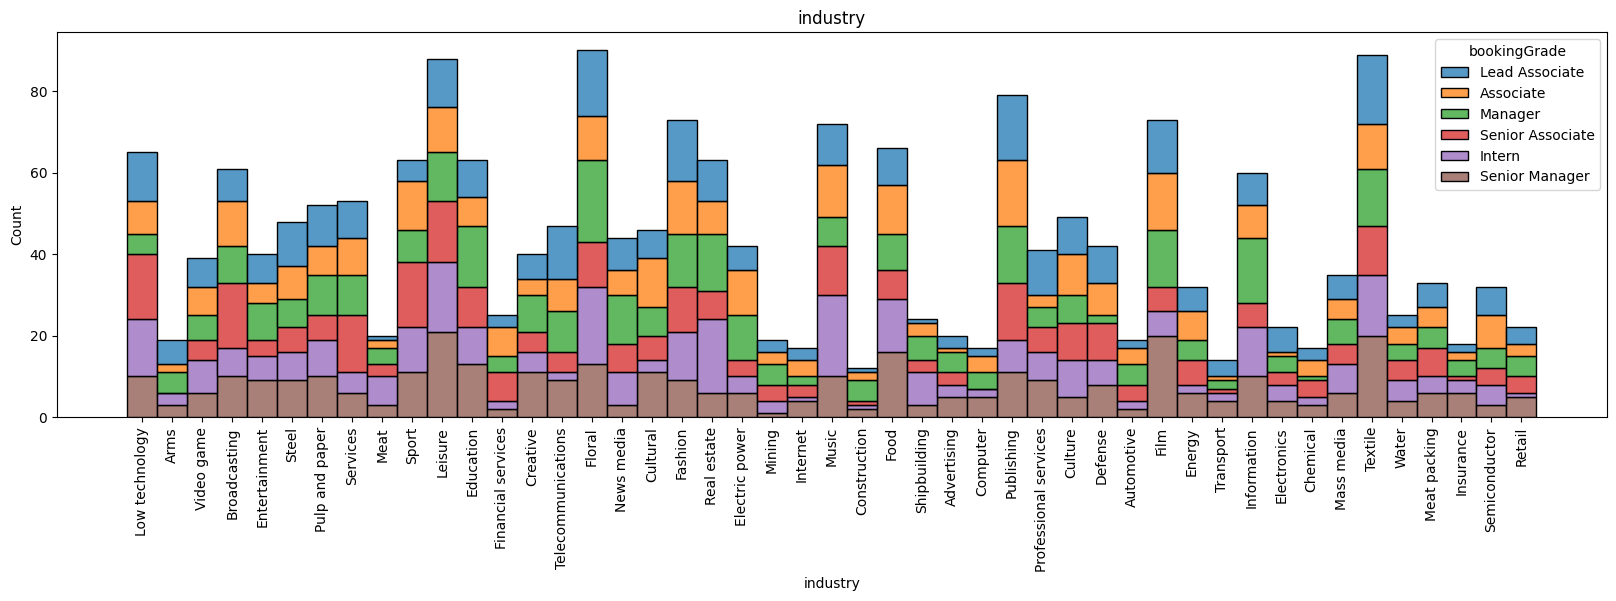

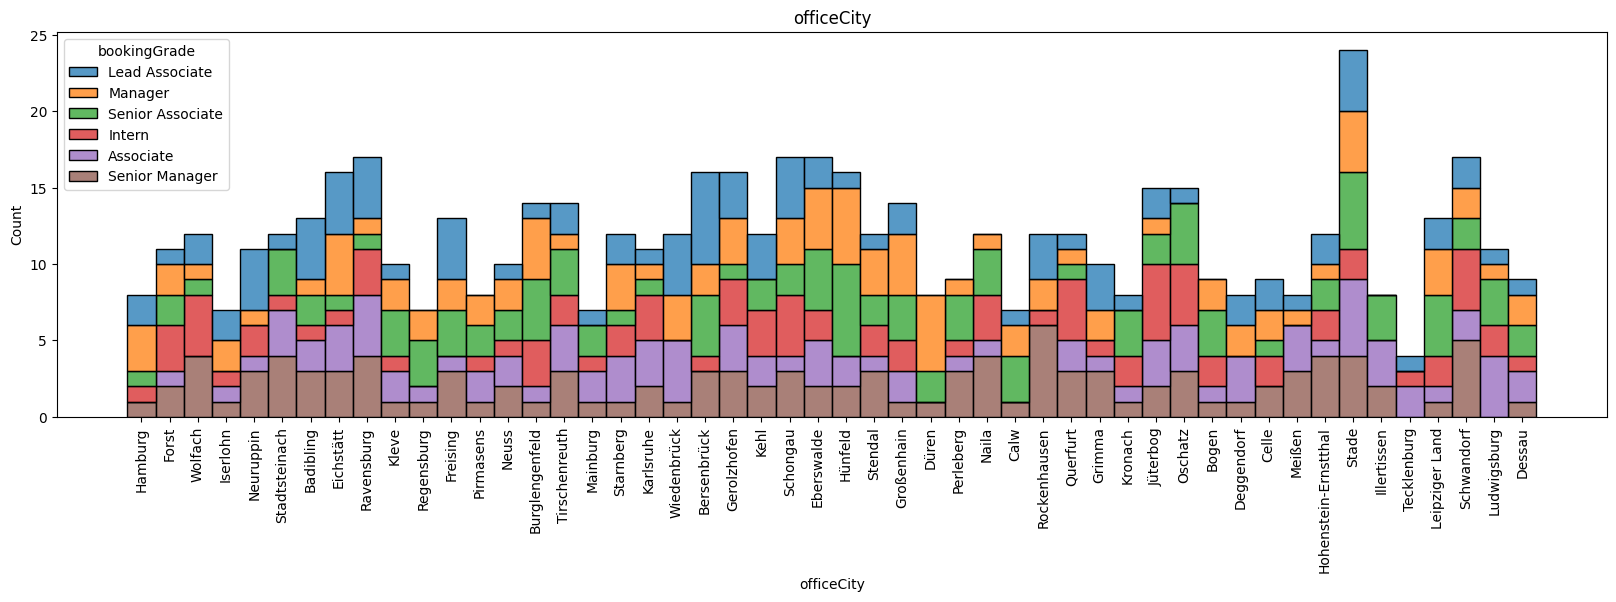

In [9]:
#Statistics of unassigned booking grades per label
def show_booking_grades_per_label(labels):
    for label in labels:
        plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
        plt.xticks(rotation=90)
        plt.title(label)
        if(label == 'officeCity'):
            cities = data['officeCity'].value_counts().head(50)
            df = data.loc[data['officeCity'].isin(cities.index)]
            sns.histplot(data=df, x=df[label], hue=df[data["isUnassigned"]]["bookingGrade"], multiple="stack")  
        else:
            sns.histplot(data=data, x=data[label], hue=data[data["isUnassigned"]]["bookingGrade"], multiple="stack")        

show_booking_grades_per_label(['clientName','industry','officeCity'])

Furthermore, it is shown in-depth statistics of the requiredSkills or optionalSkills per category. By simply changing the show_skills parameters, we can visualize the specific skills for each industry, city or booking grade.

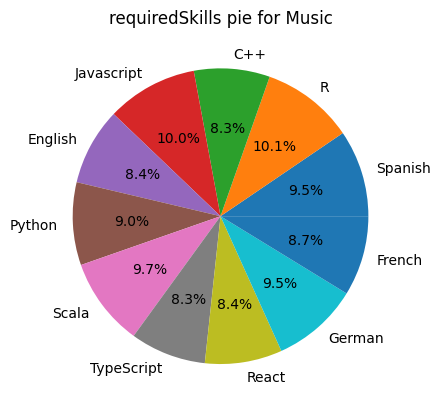

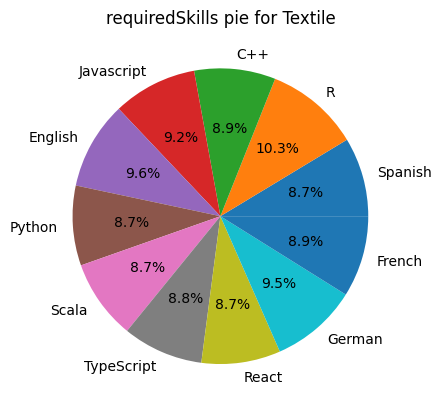

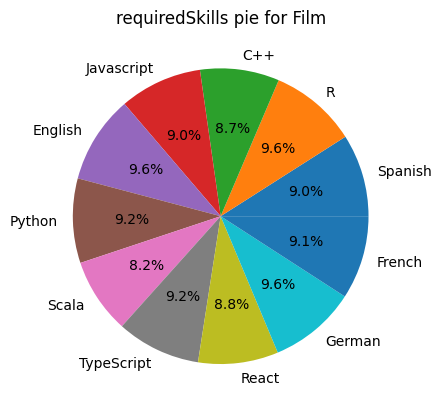

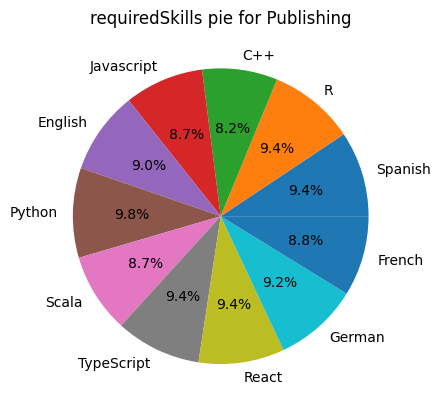

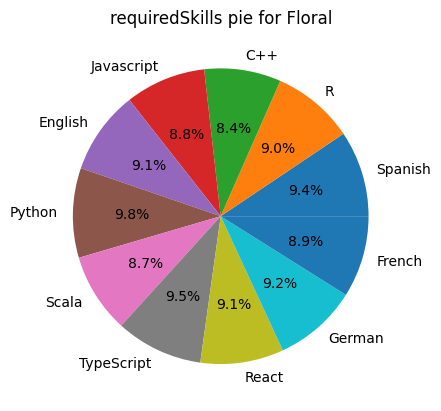

In [10]:
#statistics of requiredSkills/optionalSkills per category - industry, city, bookingGrade
def show_skills(category, category_values, skill_type):    
    df = data[[skill_type,category]]
    skills= []
    for value in category_values:
        for row in df.iterrows():
            if(row[1][category]==value):
                for skill in row[1][skill_type]: 
                    skills.append(skill['name'])
        counter_skills = Counter(skills)
        keys = list(counter_skills.keys())
        values = list(counter_skills.values())
        plt.pie(values, labels = keys, autopct='%1.1f%%')
        plt.title(skill_type + " pie for " + value)
        plt.show() 

show_skills('industry', data['industry'].value_counts().head().index, 'requiredSkills')

The most noteworthy part for me is that this dataset is close to balanced dataset. With the fact of having a balanced dataset, it is safe to assume that the classification model built should generate higher accuracy and balanced detection rate. This would avoid the possibility of the model making biased or distorted predictions, that are regarded as inaccurate, unfair, or misleading.